In [1]:
from datetime import datetime

import pandas as pd
from prophet import Prophet

import plotly.graph_objects as go

- item 1 : 기간 내 주문이력 총 90회 이상  
Code : 08910000987

- item 2 : 기간 내 주문이력 총 50~60회  
Code : 09510002017

- item 3 : 기간 내 주문이력 총 20회 미만  
Code : 09010004479

In [2]:
df_tmp = pd.read_csv('../data/processed/INV_Transacton_Summary_merge_filled_0.csv', index_col=0)
df = df_tmp[df_tmp['IEM_CODE']=='09010004479'].reset_index(drop=True) # item 3
df

,YYYYMM,IEM_CODE,ITEM_DESCRIPTION,PO_RECEIPT,SPG,UOM,OTHER_ISSUE,OTHER_RECEIPT,SALES_ISSUE,WIP_ISSUE,WIP_RECEIPT,ds
0,201401,09010004479,"IC,PHY,LAN9117-MT,QFP,TRAY,SMSC,MSL3",900.0,500,ea,0.0,0.0,0.0,0.0,0.0,2014-01
1,201402,09010004479,"IC,PHY,LAN9117-MT,QFP,TRAY,SMSC,MSL3",0.0,500,ea,0.0,0.0,0.0,0.0,0.0,2014-02
2,201403,09010004479,"IC,PHY,LAN9117-MT,QFP,TRAY,SMSC,MSL3",0.0,500,ea,0.0,0.0,0.0,0.0,0.0,2014-03
3,201404,09010004479,"IC,PHY,LAN9117-MT,QFP,TRAY,SMSC,MSL3",0.0,500,ea,0.0,0.0,0.0,0.0,0.0,2014-04
4,201405,09010004479,"IC,PHY,LAN9117-MT,QFP,TRAY,SMSC,MSL3",0.0,500,ea,0.0,0.0,0.0,0.0,0.0,2014-05
...,...,...,...,...,...,...,...,...,...,...,...,...
92,202109,09010004479,"IC,PHY,LAN9117-MT,QFP,TRAY,SMSC,MSL3",0.0,500,ea,846.0,846.0,300.0,0.0,0.0,2021-09
93,202110,09010004479,"IC,PHY,LAN9117-MT,QFP,TRAY,SMSC,MSL3",0.0,500,ea,243.0,243.0,3.0,0.0,0.0,2021-10
94,202111,09010004479,"IC,PHY,LAN9117-MT,QFP,TRAY,SMSC,MSL3",0.0,500,ea,1140.0,1140.0,1020.0,0.0,0.0,2021-11
95,202112,09010004479,"IC,PHY,LAN9117-MT,QFP,TRAY,SMSC,MSL3",900.0,500,ea,0.0,0.0,0.0,0.0,0.0,2021-12


In [3]:
df_train = df[['ds', 'PO_RECEIPT']]
df_train = df_train[df_train['ds']<'2021-11']
df_train = df_train.rename(columns = {'PO_RECEIPT' : 'y'})
df_train

,ds,y
0,2014-01,900.0
1,2014-02,0.0
2,2014-03,0.0
3,2014-04,0.0
4,2014-05,0.0
...,...,...
89,2021-06,900.0
90,2021-07,0.0
91,2021-08,900.0
92,2021-09,0.0


In [4]:
m = Prophet()
m.fit(df_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = m.make_future_dataframe(periods=24, freq='M')
future.head()

,ds
0,2014-01-01
1,2014-02-01
2,2014-03-01
3,2014-04-01
4,2014-05-01


In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
113,2023-05-31,-581.938042,-882.380253,-264.321496
114,2023-06-30,659.641941,360.641716,1011.933219
115,2023-07-31,291.509316,-28.392555,620.584286
116,2023-08-31,610.829199,277.631489,952.747760
117,2023-09-30,36.483171,-270.323963,388.614544


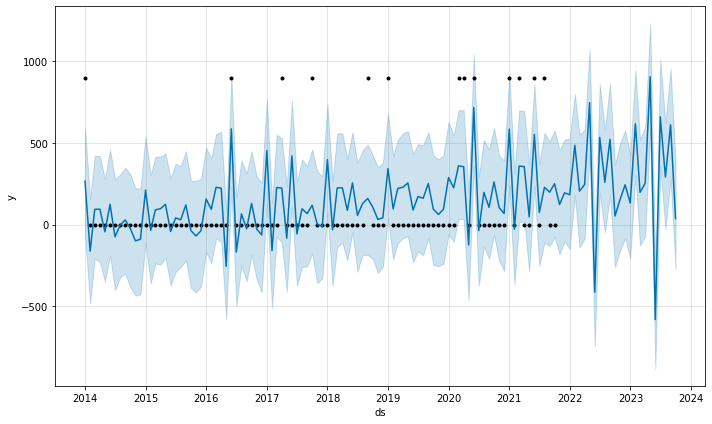

In [7]:
# Python
fig1 = m.plot(forecast)

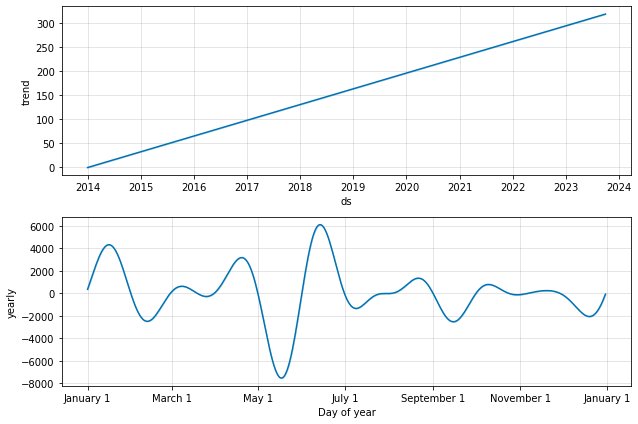

In [8]:
# Python
fig2 = m.plot_components(forecast)

In [9]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)